In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.python.lib.io import file_io

def load_image(image_path):
    image_path = image_path
    image = tf.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    image = np.array(image)
    return image

/home/vinay/Workspace/hackathons/inout6/hackinout-ai/env/lib64/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vinay/Workspace/hackathons/inout6/hackinout-ai/env/lib64/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vinay/Workspace/hackathons/inout6/hackinout-ai/env/lib64/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([

In [14]:
image = load_image("gs://deployml/6548d9a4a179483aa0109f75917f061f/index.jpeg")

In [15]:
image

array(<tf.Tensor 'DecodeJpeg_3:0' shape=(?, ?, ?) dtype=uint8>,
      dtype=object)

In [16]:
json = {"_id":"5dac36464349b66e84978a6a","classes":{"classes":[{"name":"dog","media":{"0":{},"1":{},"2":{},"3":{}},"data":[{"_id":"5dac361a4349b66e84978a62","name":"fgh.jpeg","sha256":"3FfayfZHBnMz34j2S8nhbNTRwSN9PlKmCKhN5fvwyTw","hash":"bb3e95c64f46458ebb40a3614bfcb797","ext":".jpeg","mime":"image/jpeg","size":"6.26","url":"https://storage.googleapis.com/deployml/bb3e95c64f46458ebb40a3614bfcb797/fgh.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:25:30.388Z","updatedAt":"2019-10-20T10:25:31.032Z","__v":0,"id":"5dac361a4349b66e84978a62"},{"_id":"5dac361a4349b66e84978a63","name":"index.jpeg","sha256":"QDF7Nk5UsVaz6XWRKz8mQZrXqbHToDBMhjbb2CY6u7U","hash":"99715fae2b2748858b48d79250499a33","ext":".jpeg","mime":"image/jpeg","size":"9.27","url":"https://storage.googleapis.com/deployml/99715fae2b2748858b48d79250499a33/index.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:25:30.500Z","updatedAt":"2019-10-20T10:25:31.033Z","__v":0,"id":"5dac361a4349b66e84978a63"},{"_id":"5dac36194349b66e84978a61","name":"sd.jpeg","sha256":"uCRY4GkU3qGAiPMplHDpD3tmKOKaaCCAWknqrMdsask","hash":"1b3b87b163ce4987b36cd1253d370fb0","ext":".jpeg","mime":"image/jpeg","size":"7.60","url":"https://storage.googleapis.com/deployml/1b3b87b163ce4987b36cd1253d370fb0/sd.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:25:29.552Z","updatedAt":"2019-10-20T10:25:29.986Z","__v":0,"id":"5dac36194349b66e84978a61"},{"_id":"5dac36294349b66e84978a64","name":"sfg.jpeg","sha256":"685SolWerRj-nJTSdRXnuGsE4KhZl_YHPTbc0BhBnRA","hash":"e06e33345c9f4cafa18c6da85a58ab71","ext":".jpeg","mime":"image/jpeg","size":"9.38","url":"https://storage.googleapis.com/deployml/e06e33345c9f4cafa18c6da85a58ab71/sfg.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:25:45.200Z","updatedAt":"2019-10-20T10:25:45.782Z","__v":0,"id":"5dac36294349b66e84978a64"}]},{"name":"cat","media":{"0":{},"1":{},"2":{},"3":{},"4":{}},"data":[{"_id":"5dac36394349b66e84978a68","name":"car567.jpeg","sha256":"Qr9JYxnYC0FK_jkuTA3bzMQpOgt1krBJunmEeDGJJUg","hash":"c738926bc93547c28b88213cec449eb1","ext":".jpeg","mime":"image/jpeg","size":"10.00","url":"https://storage.googleapis.com/deployml/c738926bc93547c28b88213cec449eb1/car567.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:26:01.248Z","updatedAt":"2019-10-20T10:26:01.692Z","__v":0,"id":"5dac36394349b66e84978a68"},{"_id":"5dac36424349b66e84978a69","name":"cat.jpeg","sha256":"ZC_bLtbTPJKOLiEzcRtlTS-ro5zM1+cj5Z2TNqniNpY","hash":"8618bb33a5a44947bd1b00d45304a0f6","ext":".jpeg","mime":"image/jpeg","size":"7.96","url":"https://storage.googleapis.com/deployml/8618bb33a5a44947bd1b00d45304a0f6/cat.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:26:10.408Z","updatedAt":"2019-10-20T10:26:11.050Z","__v":0,"id":"5dac36424349b66e84978a69"},{"_id":"5dac36354349b66e84978a67","name":"cat4.jpeg","sha256":"y5gTrwtwBdMHtIkx-CWqwKg6tZNay3Ghrf8mEcM_QZU","hash":"477b3c5877ef4efe80cccfaee71aa0e8","ext":".jpeg","mime":"image/jpeg","size":"6.36","url":"https://storage.googleapis.com/deployml/477b3c5877ef4efe80cccfaee71aa0e8/cat4.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:25:57.386Z","updatedAt":"2019-10-20T10:25:57.728Z","__v":0,"id":"5dac36354349b66e84978a67"},{"_id":"5dac36354349b66e84978a66","name":"cat23.jpeg","sha256":"ILrbFpcm9-FQOu1sRZ0Wfp6Gc2vzjrdkt311jyeY8Sw","hash":"92c9bc1c95ce4605bff7dca1d1d0623d","ext":".jpeg","mime":"image/jpeg","size":"7.67","url":"https://storage.googleapis.com/deployml/92c9bc1c95ce4605bff7dca1d1d0623d/cat23.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:25:57.085Z","updatedAt":"2019-10-20T10:25:57.437Z","__v":0,"id":"5dac36354349b66e84978a66"},{"_id":"5dac36324349b66e84978a65","name":"cat98.jpeg","sha256":"E-WvXCqSL42nQsSW2r5jTEbE_jtTt-dUXgXqmesK34E","hash":"b9539c3fb1a941b6b10c9436a3d04fd3","ext":".jpeg","mime":"image/jpeg","size":"6.91","url":"https://storage.googleapis.com/deployml/b9539c3fb1a941b6b10c9436a3d04fd3/cat98.jpeg","provider":"google-cloud-storage","related":[],"createdAt":"2019-10-20T10:25:54.828Z","updatedAt":"2019-10-20T10:25:55.381Z","__v":0,"id":"5dac36324349b66e84978a65"}]}]},"name":"dog vs cats","typeproject":"IMG","createdAt":"2019-10-20T10:26:14.840Z","updatedAt":"2019-10-20T10:26:15.657Z","__v":0,"modelfile":[],"id":"5dac36464349b66e84978a6a"}

In [43]:
data = json['classes']['classes']
X = []

for d in data:
    for item in d['data']:
        X.append({'image': item['url'], 'label': d['name']})

X

[{'image': 'https://storage.googleapis.com/deployml/bb3e95c64f46458ebb40a3614bfcb797/fgh.jpeg',
  'label': 'dog'},
 {'image': 'https://storage.googleapis.com/deployml/99715fae2b2748858b48d79250499a33/index.jpeg',
  'label': 'dog'},
 {'image': 'https://storage.googleapis.com/deployml/1b3b87b163ce4987b36cd1253d370fb0/sd.jpeg',
  'label': 'dog'},
 {'image': 'https://storage.googleapis.com/deployml/e06e33345c9f4cafa18c6da85a58ab71/sfg.jpeg',
  'label': 'dog'},
 {'image': 'https://storage.googleapis.com/deployml/c738926bc93547c28b88213cec449eb1/car567.jpeg',
  'label': 'cat'},
 {'image': 'https://storage.googleapis.com/deployml/8618bb33a5a44947bd1b00d45304a0f6/cat.jpeg',
  'label': 'cat'},
 {'image': 'https://storage.googleapis.com/deployml/477b3c5877ef4efe80cccfaee71aa0e8/cat4.jpeg',
  'label': 'cat'},
 {'image': 'https://storage.googleapis.com/deployml/92c9bc1c95ce4605bff7dca1d1d0623d/cat23.jpeg',
  'label': 'cat'},
 {'image': 'https://storage.googleapis.com/deployml/b9539c3fb1a941b6b10c9

In [45]:
import pandas as pd

df = pd.DataFrame(data = X)

df.head()

,image,label
0,https://storage.googleapis.com/deployml/bb3e95...,dog
1,https://storage.googleapis.com/deployml/99715f...,dog
2,https://storage.googleapis.com/deployml/1b3b87...,dog
3,https://storage.googleapis.com/deployml/e06e33...,dog
4,https://storage.googleapis.com/deployml/c73892...,cat


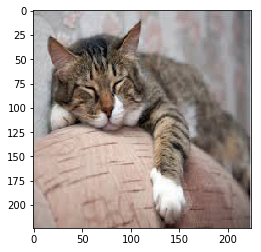

In [19]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def load_image(imagepath, shape=(224,224)):
    response = requests.get(imagepath)
    img = Image.open(BytesIO(response.content))
    img = img.resize(shape)
    return img
    
image = load_image(df['image'][0])
plt.imshow(image)

In [50]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

Using TensorFlow backend.


553467904/553467096 [==============================] - 434s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_

In [20]:
import tensorflow as tf
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense

In [21]:
resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [23]:
#Still not talking about our train/test data or any pre-processing.

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(2, activation = 'sigmoid'))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [46]:
## Data Generation + Storage

# def replace_str(string):
#         return string.replace('https://storage.googleapis.com/deployml/', '')

# df['path'] = df['image'].apply(replace_str)

df['path'] = df['image'].apply(lambda x: x.replace('https://storage.googleapis.com/deployml/', ''))



df

,image,label,path
0,https://storage.googleapis.com/deployml/bb3e95...,dog,bb3e95c64f46458ebb40a3614bfcb797/fgh.jpeg
1,https://storage.googleapis.com/deployml/99715f...,dog,99715fae2b2748858b48d79250499a33/index.jpeg
2,https://storage.googleapis.com/deployml/1b3b87...,dog,1b3b87b163ce4987b36cd1253d370fb0/sd.jpeg
3,https://storage.googleapis.com/deployml/e06e33...,dog,e06e33345c9f4cafa18c6da85a58ab71/sfg.jpeg
4,https://storage.googleapis.com/deployml/c73892...,cat,c738926bc93547c28b88213cec449eb1/car567.jpeg
5,https://storage.googleapis.com/deployml/8618bb...,cat,8618bb33a5a44947bd1b00d45304a0f6/cat.jpeg
6,https://storage.googleapis.com/deployml/477b3c...,cat,477b3c5877ef4efe80cccfaee71aa0e8/cat4.jpeg
7,https://storage.googleapis.com/deployml/92c9bc...,cat,92c9bc1c95ce4605bff7dca1d1d0623d/cat23.jpeg
8,https://storage.googleapis.com/deployml/b9539c...,cat,b9539c3fb1a941b6b10c9436a3d04fd3/cat98.jpeg


In [10]:
import os

X = []
y = []

for index, row in df.iterrows():
    if not os.path.exists("../tmp/"+row['label']+"/" + row['path'].split('/')[0]):
        os.makedirs("../tmp/"+row['label']+"/" + row['path'].split('/')[0])
    
    image = load_image(row['image'], shape=(224,224))
    X.append(np.array(image))
    y.append(row['label'])
    image.save("../tmp/"+row['label']+"/"+row['path'])

In [14]:
model.save('resnet.hdf5')

In [122]:
from keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [123]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    vertical_flip=True,
    horizontal_flip=True)

In [124]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

X = np.array(X)
y = np.asarray(y)

encoder = LabelBinarizer()
y_cat = encoder.fit_transform(y)
print(y_cat)

# Split the dataset into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.20, shuffle=True)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[[0]
 [0]]


In [125]:
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),
                              steps_per_epoch=32, epochs=20,
                              validation_data=(X_test, y_test))

Epoch 1/20
32/32 [==============================] - 11s 350ms/step - loss: 0.0146 - acc: 1.0000 - val_loss: 3.3741e-07 - val_acc: 1.0000
Epoch 2/20
32/32 [==============================] - 6s 203ms/step - loss: 3.7971e-06 - acc: 1.0000 - val_loss: 2.0800e-07 - val_acc: 1.0000
Epoch 3/20
32/32 [==============================] - 6s 199ms/step - loss: 3.3678e-06 - acc: 1.0000 - val_loss: 2.0381e-07 - val_acc: 1.0000
Epoch 4/20
32/32 [==============================] - 7s 223ms/step - loss: 3.5985e-06 - acc: 1.0000 - val_loss: 2.0291e-07 - val_acc: 1.0000
Epoch 5/20
32/32 [==============================] - 8s 254ms/step - loss: 3.4342e-06 - acc: 1.0000 - val_loss: 2.0213e-07 - val_acc: 1.0000
Epoch 6/20
32/32 [==============================] - 8s 259ms/step - loss: 3.4869e-06 - acc: 1.0000 - val_loss: 2.0135e-07 - val_acc: 1.0000
Epoch 7/20
32/32 [==============================] - 7s 222ms/step - loss: 3.2691e-06 - acc: 1.0000 - val_loss: 2.0058e-07 - val_acc: 1.0000
Epoch 8/20
32/32 [=====